In [1]:
%matplotlib inline

from datetime import datetime

from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import skew
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from scipy.special import inv_boxcox1p
from mlxtend.regressor import StackingRegressor
from sklearn.preprocessing import scale
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from mlxtend.regressor import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectPercentile, f_classif
from scipy.stats import zscore, pearsonr


import warnings
warnings.filterwarnings('ignore')


# 用于正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
# 设置图片清晰度
%config InlineBackend.figure_format = 'retina'  

In [2]:
train = pd.read_csv('../original_data/train_dataset.csv')
test = pd.read_csv('../original_data/test_dataset.csv')

In [3]:
data = pd.concat([train, test]).reset_index(drop=True)

In [4]:
def conversion_month_year(month):
    try:
        return month / 12.0
    except Exception:
        return -12.0
    
    
data['用户网龄（年）'] = data['用户网龄（月）'].map(conversion_month_year)
data.drop(['用户网龄（月）'], axis=1, inplace=True)

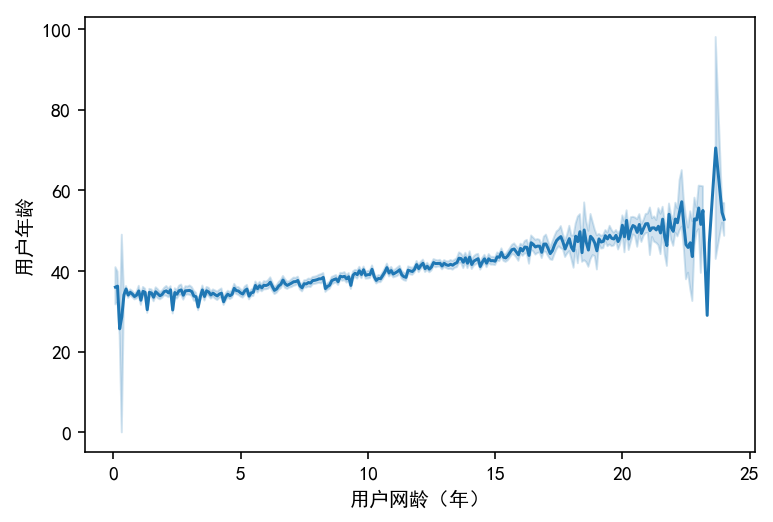

In [5]:
sns.lineplot(x='用户网龄（年）', y='用户年龄', data=data)

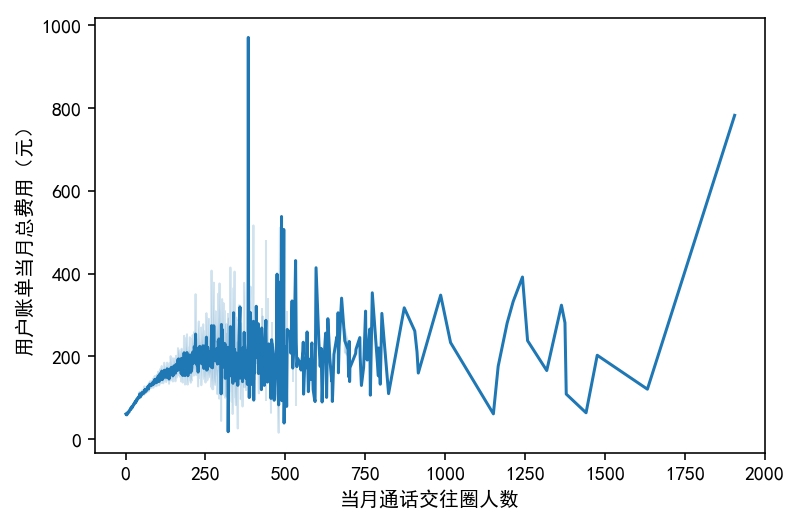

In [6]:
sns.lineplot(x='当月通话交往圈人数', y='用户账单当月总费用（元）', data=data)

In [7]:
data['用户近5个月平均消费值（元）'] = (data['用户近6个月平均消费值（元）']*6-data['用户账单当月总费用（元）'])/5

In [8]:
pearsonr(data['用户近5个月平均消费值（元）'], data['用户近6个月平均消费值（元）'])

(0.995945494181872, 0.0)

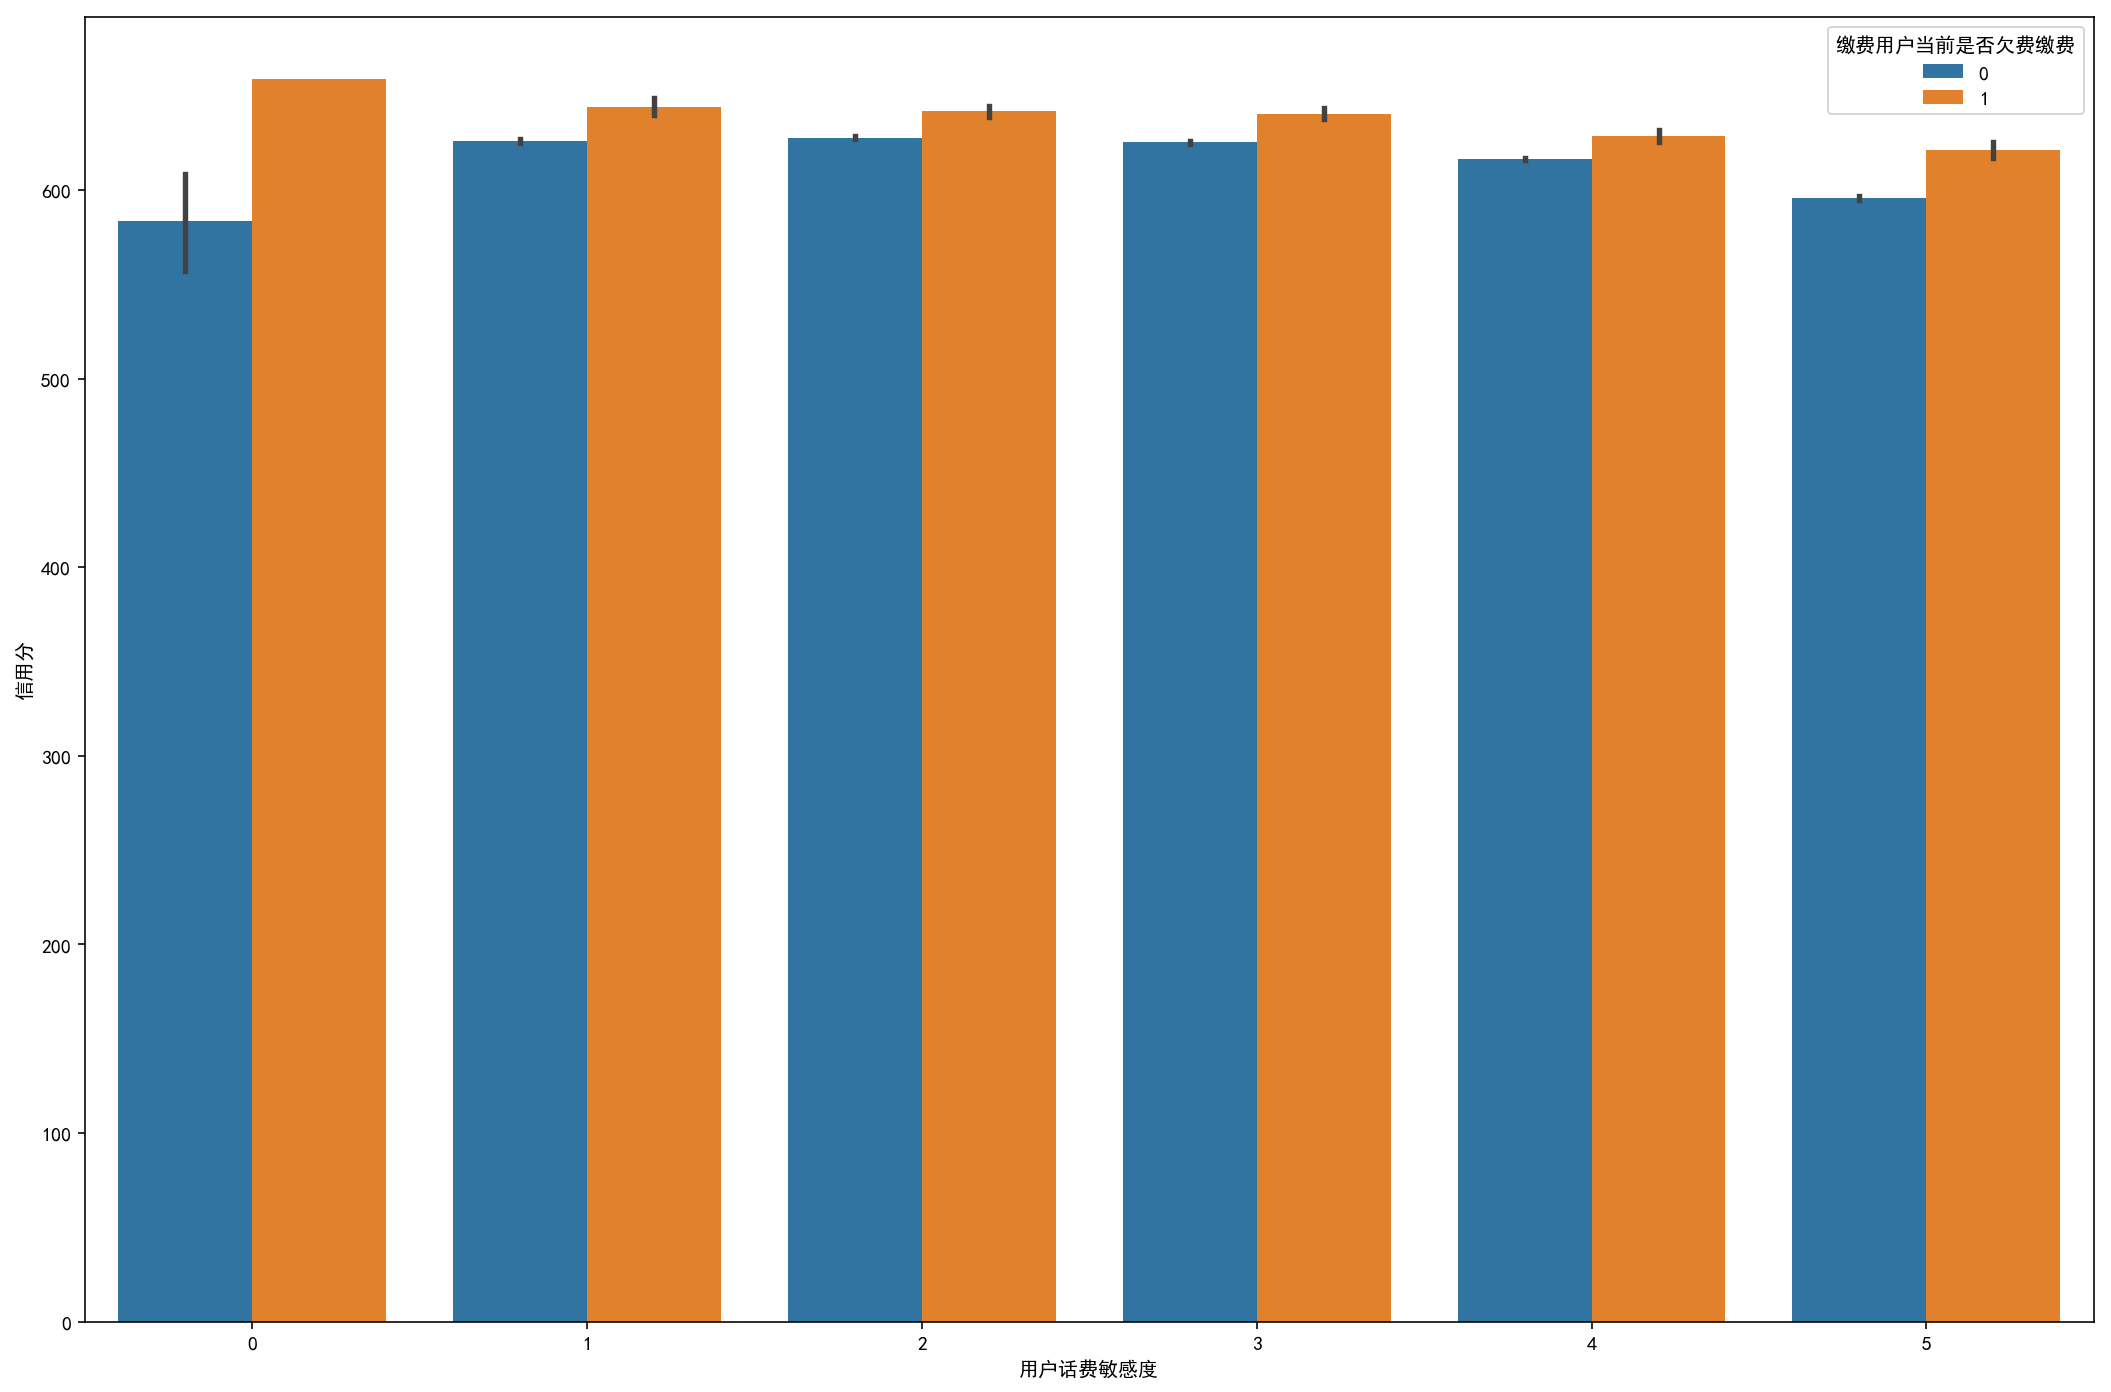

In [9]:
plt.figure(figsize=(18, 12))
sns.barplot(x='用户话费敏感度', y='信用分', hue="缴费用户当前是否欠费缴费", data=data)

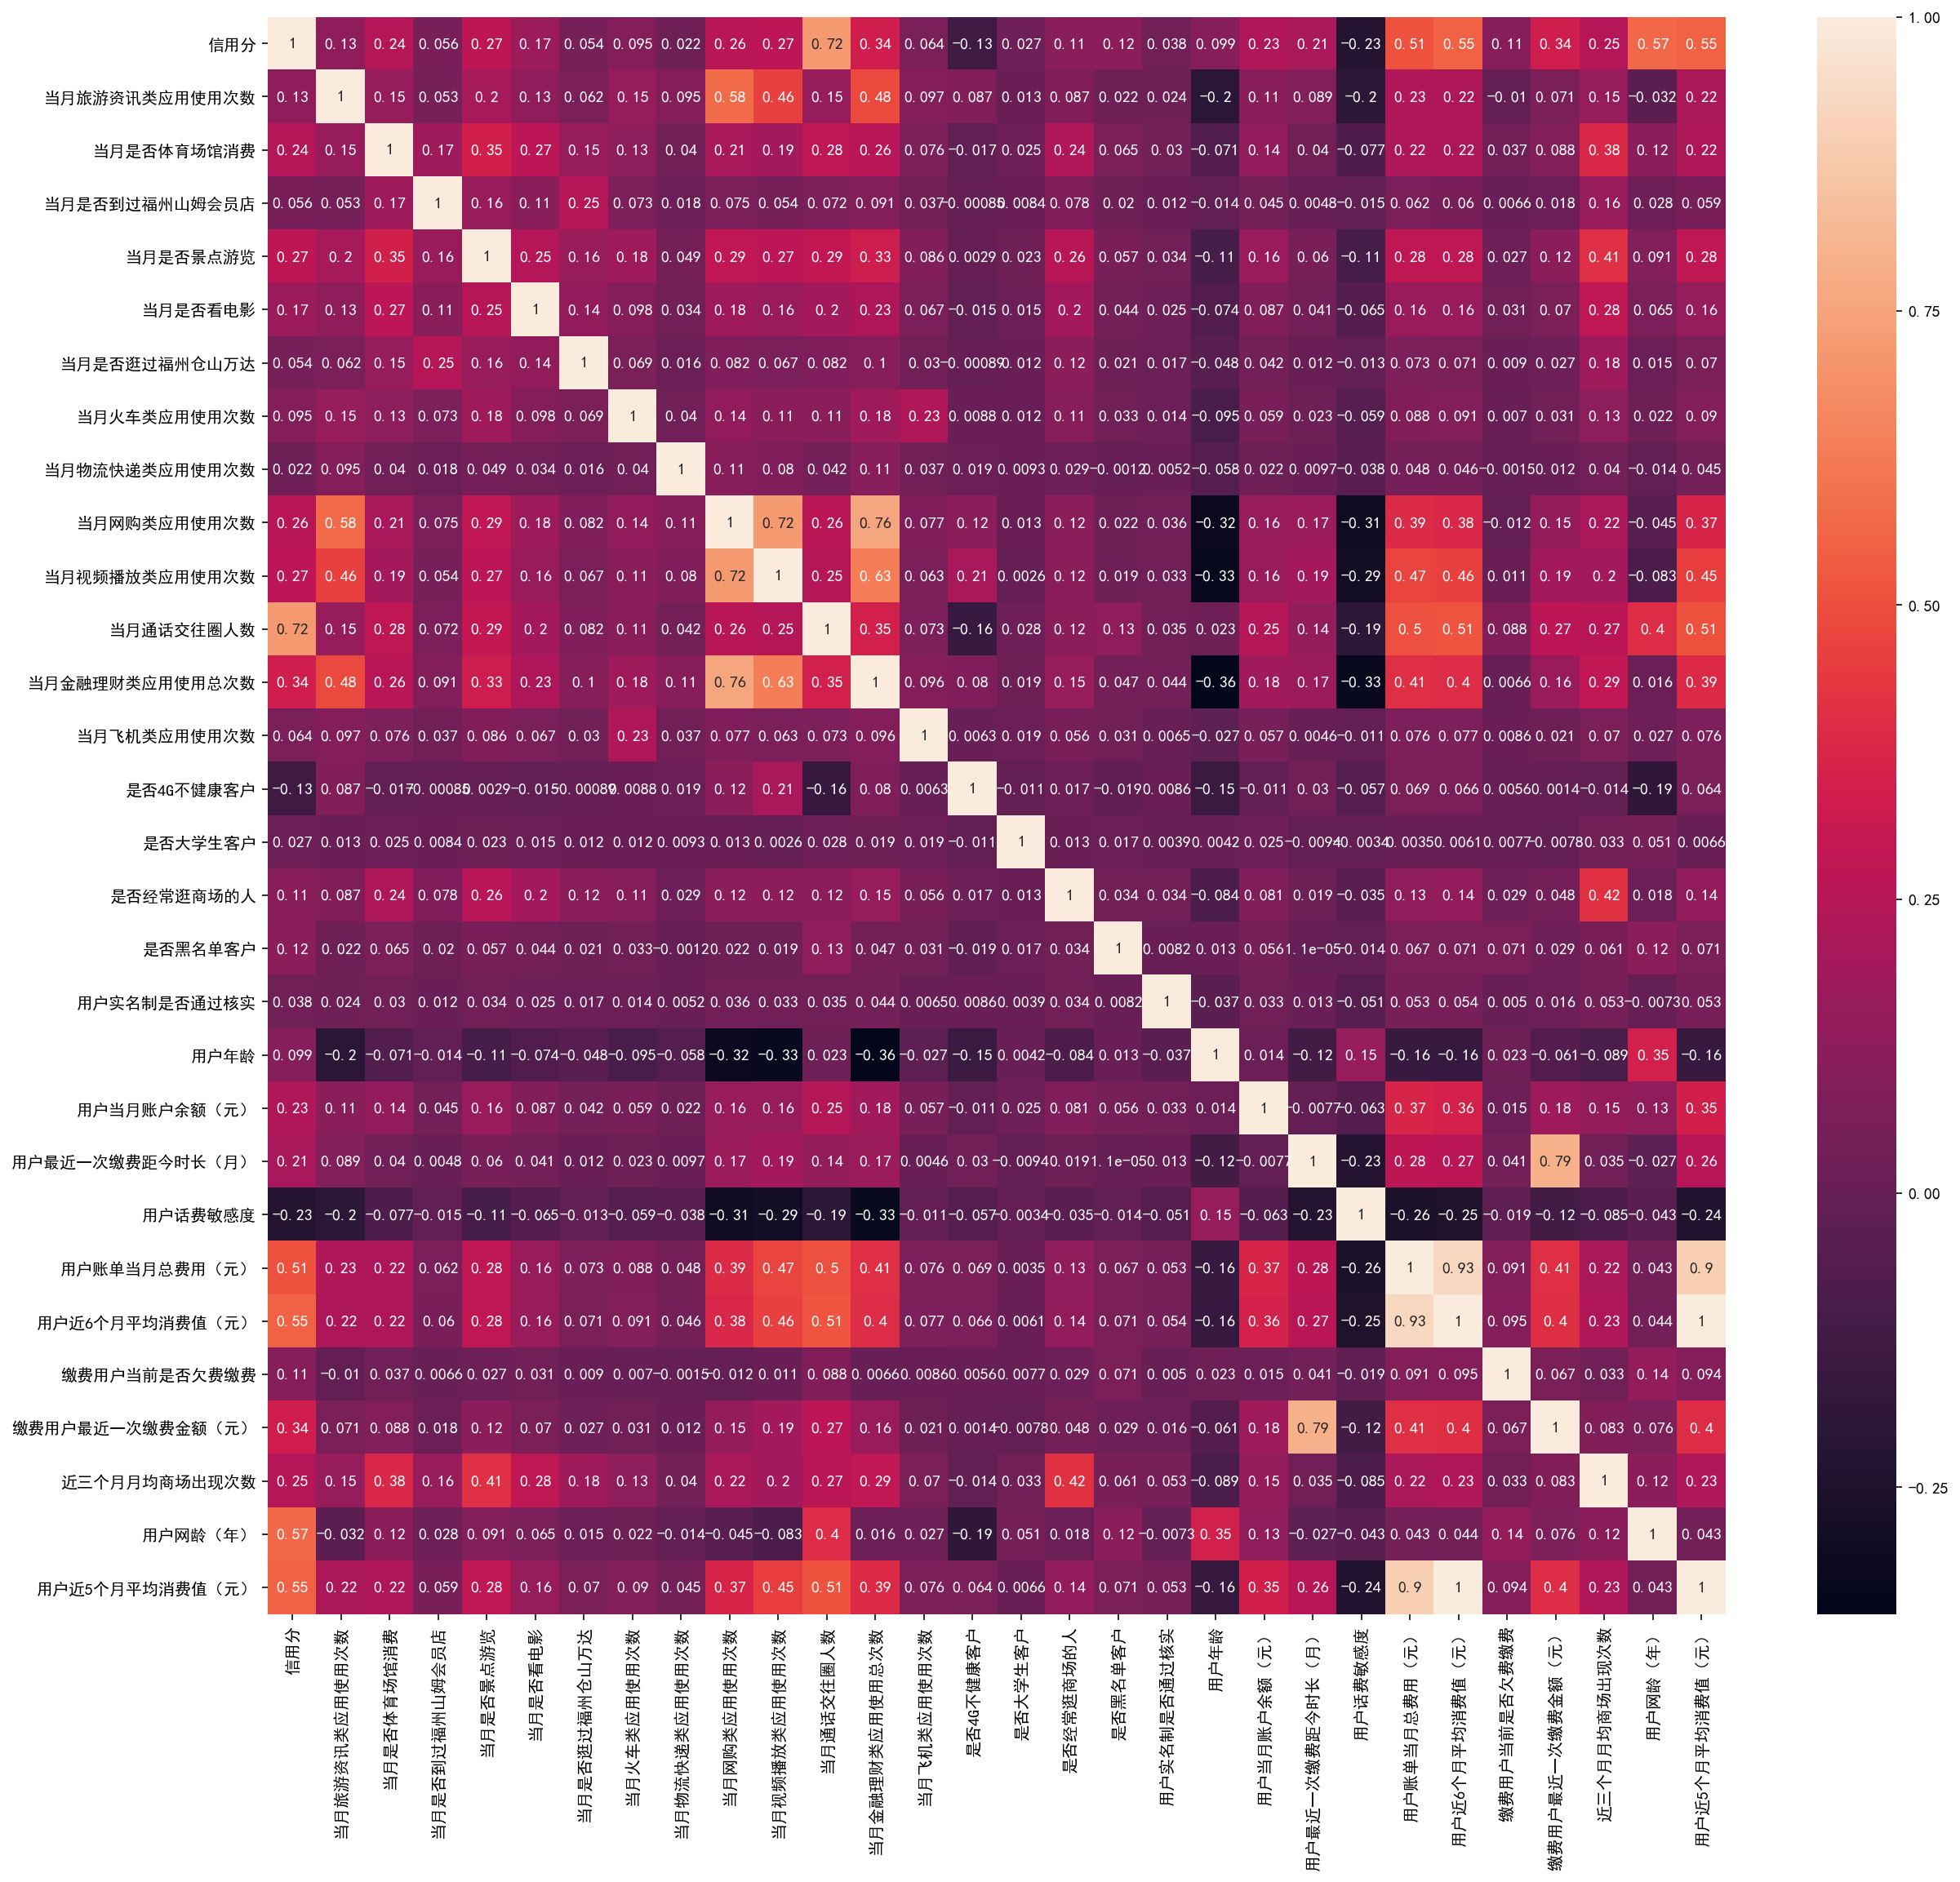

In [10]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(method='spearman'), annot=True)

In [11]:
data.columns

Index(['信用分', '当月旅游资讯类应用使用次数', '当月是否体育场馆消费', '当月是否到过福州山姆会员店', '当月是否景点游览',
       '当月是否看电影', '当月是否逛过福州仓山万达', '当月火车类应用使用次数', '当月物流快递类应用使用次数',
       '当月网购类应用使用次数', '当月视频播放类应用使用次数', '当月通话交往圈人数', '当月金融理财类应用使用总次数',
       '当月飞机类应用使用次数', '是否4G不健康客户', '是否大学生客户', '是否经常逛商场的人', '是否黑名单客户',
       '用户实名制是否通过核实', '用户年龄', '用户当月账户余额（元）', '用户最近一次缴费距今时长（月）', '用户编码',
       '用户话费敏感度', '用户账单当月总费用（元）', '用户近6个月平均消费值（元）', '缴费用户当前是否欠费缴费',
       '缴费用户最近一次缴费金额（元）', '近三个月月均商场出现次数', '用户网龄（年）', '用户近5个月平均消费值（元）'],
      dtype='object')

In [12]:
data.groupby('用户话费敏感度', sort=False)['信用分'].mean()

用户话费敏感度
3    626.188272
1    627.413277
2    628.749683
5    597.301033
4    617.160197
0    588.733333
Name: 信用分, dtype: float64

In [25]:
data.groupby('当月是否到过福州山姆会员店')['信用分'].mean()

当月是否到过福州山姆会员店
0    617.66962
1    631.80826
Name: 信用分, dtype: float64